In [7]:
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
notebooks_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebooks_dir, os.pardir))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.data      import load_data
from src.utils     import set_seed
set_seed(42)
sns.set(style="whitegrid")



In [8]:
# Carga de datos
train = load_data('../data/raw/train.csv')
test  = load_data('../data/raw/test.csv')
print("Train shape:", train.shape)
print("Test  shape:", test.shape)

Train shape: (18524, 9)
Test  shape: (6175, 8)


In [9]:
# Primer vistazo
display(train.head())
train.info()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [10]:
# Estadísticas descriptivas
display(train.describe())

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


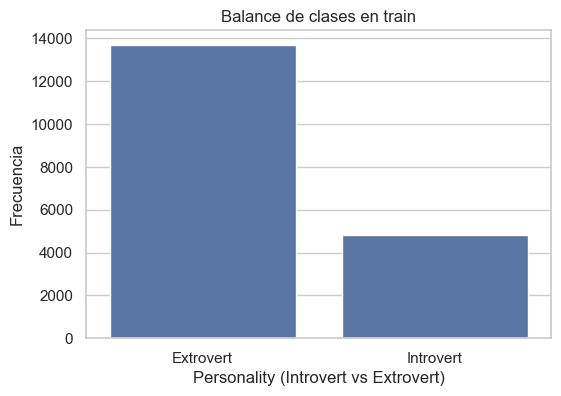

In [11]:
# Balance de clases
plt.figure(figsize=(6,4))
sns.countplot(x='Personality', data=train)
plt.title('Balance de clases en train')
plt.xlabel('Personality (Introvert vs Extrovert)')
plt.ylabel('Frecuencia')
plt.show()

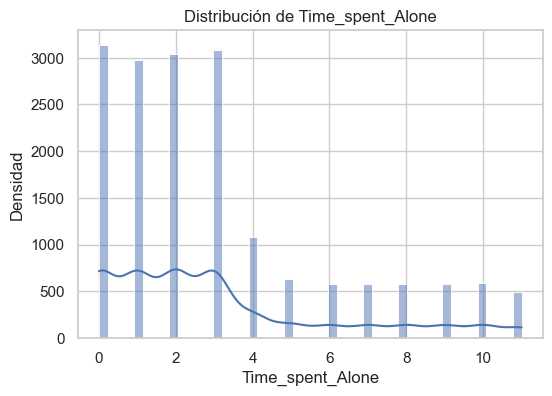

In [12]:
# Distribución de alguna feature de ejemplo
plt.figure(figsize=(6,4))
sns.histplot(train['Time_spent_Alone'], kde=True)
plt.title('Distribución de Time_spent_Alone')
plt.xlabel('Time_spent_Alone')
plt.ylabel('Densidad')
plt.show()